In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Importing necessary libraries for model development and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd
# Read the dataset
dataset_path = "cvd_data_preprocessed.csv"
data = pd.read_csv(dataset_path)
display(data.head(n=5))
df_copy = data.copy()
data.shape

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,10.0,0.000000,0.000000,0.000000,1.0,0.000000,0.250000,0.125000,0.09375
1,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,10.0,0.348837,0.295420,0.326529,0.0,0.000000,0.250000,0.000000,0.03125
2,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,8.0,0.302326,0.409059,0.491063,0.0,0.133333,0.100000,0.023438,0.12500
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,0.0,1.0,11.0,0.697674,0.459064,0.340504,0.0,0.000000,0.250000,0.234375,0.06250
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,12.0,0.953488,0.409059,0.202016,1.0,0.000000,0.066667,0.031250,0.00000


(308774, 19)

In [3]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and the target (y)
X = data.drop("Heart_Disease", axis=1)
y = data["Heart_Disease"]

# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     85100
         1.0       0.54      0.06      0.11      7533

    accuracy                           0.92     92633
   macro avg       0.73      0.53      0.53     92633
weighted avg       0.89      0.92      0.89     92633

Model: Decision Tree
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     85100
         1.0       0.20      0.23      0.21      7533

    accuracy                           0.86     92633
   macro avg       0.56      0.57      0.57     92633
weighted avg       0.87      0.86      0.87     92633

Model: Random Forest
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     85100
         1.0       0.45      0.04      0.07      7533

    accuracy                           0.92     92633
   macro avg       0.69      0.52      0.51     92633
weigh

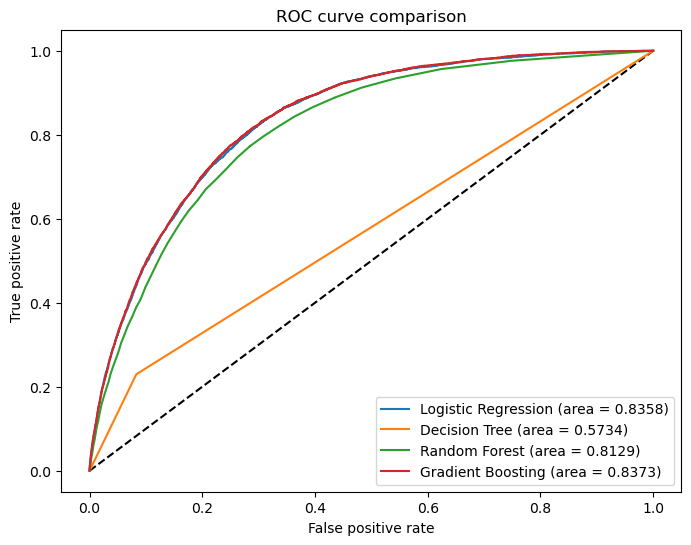

In [48]:
# Defining the function to apply models
def apply_model(model, X_train, y_train, X_test, y_test, name):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print('==========================================================')
    
    # Compute ROC curve and ROC area
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return accuracy, precision, recall, f1, fpr, tpr, roc_auc

# Defining the models
models = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=500)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    # ("Support Vector Machine", SVC(random_state=42, probability=True))
]

# Applying the models and storing the results
results = []
roc_curves = []

for name, model in models:
    accuracy, precision, recall, f1, fpr, tpr, roc_auc = apply_model(model, X_train, y_train, X_test, y_test, name)
    results.append((name, accuracy, precision, recall, f1))
    roc_curves.append((name, fpr, tpr, roc_auc))

# Plotting the ROC curves for each model
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve comparison')
for name, fpr, tpr, roc_auc in roc_curves:
    plt.plot(fpr, tpr, label=f"{name} (area = {roc_auc:.4f})")
plt.legend(loc='best')
plt.show()

In [54]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train and X_test are numpy arrays
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

# Create a KNN classifier with specified number of neighbors
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the scaled training data
knn_classifier.fit(X_train, y_train)

# Get the predicted labels for the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Model: k-Nearest Neighbors (KNN)")
print(classification_report(y_test, y_pred))
print('==========================================================')

Model: k-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     85100
         1.0       0.33      0.11      0.17      7533

    accuracy                           0.91     92633
   macro avg       0.63      0.55      0.56     92633
weighted avg       0.88      0.91      0.89     92633



In [15]:
# Create a logistic regression object with class weight and a lower threshold
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
threshold = 0.6

# Fit the model on the scaled training data
log_reg.fit(X_train, y_train)

# Get the probabilities for each class
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Make predictions based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model: Logistic regression")
print(classification_report(y_test, y_pred))
print('==========================================================')

Model: Logistic regression
              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88     56677
         1.0       0.25      0.69      0.36      5078

    accuracy                           0.80     61755
   macro avg       0.61      0.75      0.62     61755
weighted avg       0.91      0.80      0.84     61755



In [40]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing

# Define the hyperparameter grid with different values for penalty, C, and l1_ratio
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['elasticnet','l1','l2','none'], # Remove None from penalty options
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.3] # Add l1_ratio for elasticnet penalty
}

# Create a logistic regression object with a larger max_iter
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Create a grid search object with F1-score as the scoring metric
grid_search = GridSearchCV(log_reg, param_grid, scoring='f1', cv=5)

# Fit the grid search on the scaled training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the scaled test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance metrics using the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results using the best model
print("Model: Logistic Regression")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\ziyan\anaconda3\lib\site-packag

C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `

KeyboardInterrupt: 

In [7]:
# Import the library
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of the RandomUnderSampler with a 1:1 ratio
rus = RandomUnderSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Fit the model on the resampled training data
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model: Logistic regression with random undersampling")
print(classification_report(y_test, y_pred))
print('==========================================================')

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\ziyan\anaconda3\lib\site-packages\imblearn\utils\_validation.py)

In [17]:
!python info --envs

python: can't open file 'C:\\Users\\ziyan\\Data-Science-Assignment\\info': [Errno 2] No such file or directory
